# Exploratory notebook

In [1]:
!pip install netCDF4

In [2]:
import os

from tifffile import tifffile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from netCDF4 import Dataset as ncDataset
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [19]:
# Check if running on GPU runtime
torch.cuda.is_available()

# Initialize RNG
rng = np.random.default_rng()

## Pull latest from git repos

In [4]:
os.chdir('/content/drive/Shareddrives/emit-ecostress/EMIT-ECOSTRESS')
!git pull https://github.com/DannyCollinson/EMIT-ECOSTRESS.git

From https://github.com/DannyCollinson/EMIT-ECOSTRESS
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [5]:
os.chdir('/content/drive/Shareddrives/emit-ecostress/VITALS')
!git pull https://github.com/DannyCollinson/VITALS.git

From https://github.com/DannyCollinson/VITALS
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


## Load and explore ECOSTRESS average LST data LA day/night summer 2018-2021

In [6]:
im_day = tifffile.imread('/content/drive/Shareddrives/emit-ecostress/Data/ECOSTRESS_LA_daytime_summer_LST_2018_2021.tif')
im_night = tifffile.imread('/content/drive/Shareddrives/emit-ecostress/Data/ECOSTRESS_LA_nighttime_summer_LST_2018_2021.tif')

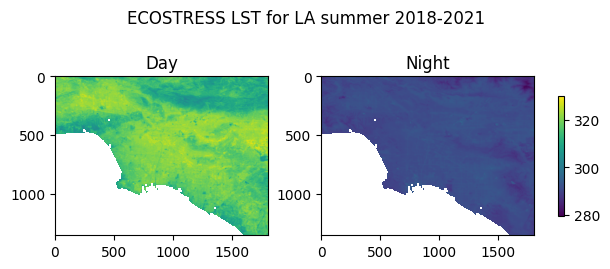

In [7]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(6, 2.75))
fig.suptitle('ECOSTRESS LST for LA summer 2018-2021')
axs[0].title.set_text('Day')
axs[1].title.set_text('Night')
normalizer = Normalize(
    min(np.nanmin(im_day), np.nanmin(im_night)),
    max(np.nanmax(im_day), np.nanmax(im_night)),
)
axs[0].imshow(im_day, norm=normalizer)
axs[1].imshow(im_night, norm=normalizer)
fig.colorbar(ScalarMappable(normalizer), ax=axs, shrink=0.5, fraction=0.5)
plt.show()

In [8]:
day_vals = im_day[~np.isnan(im_day)]
night_vals = im_night[~np.isnan(im_night)]

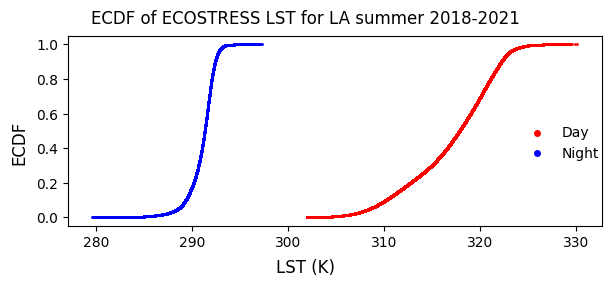

In [9]:
fig, ax = plt.subplots(layout='constrained', figsize=(6, 2.75))
fig.suptitle('ECDF of ECOSTRESS LST for LA summer 2018-2021')
fig.supylabel('ECDF')
fig.supxlabel('LST (K)')
ax.scatter(
    np.sort(day_vals),
    np.arange(1, len(day_vals) + 1) / len(day_vals),
    s=1,
    c='r',
    label='Day'
)
ax.scatter(
    np.sort(night_vals),
    np.arange(1, len(night_vals) + 1) / len(night_vals),
    s=1,
    c='b',
    label='Night'
)
fig.legend(loc='right', markerscale=4, frameon=False)
plt.show()

## Load and explore EMIT data 2023-07-28

In [10]:
# emit_002 = ncDataset('/content/drive/Shareddrives/emit-ecostress/Data/EMIT_L2A_RFL_001_20230728T214106_2320914_002.nc')
emit_003 = ncDataset('/content/drive/Shareddrives/emit-ecostress/Data/EMIT_L2A_RFL_001_20230728T214118_2320914_003.nc')
for key in vars(emit_003).keys():
    print(key)
    # print(vars(emit_002)[key])
    print(vars(emit_003)[key], end='\n\n')

ncei_template_version
NCEI_NetCDF_Swath_Template_v2.0

summary
The Earth Surface Mineral Dust Source Investigation (EMIT) is an Earth Ventures-Instrument (EVI-4) Mission that maps the surface mineralogy of arid dust source regions via imaging spectroscopy in the visible and short-wave infrared (VSWIR). Installed on the International Space Station (ISS), the EMIT instrument is a Dyson imaging spectrometer that uses contiguous spectroscopic measurements from 410 to 2450 nm to resolve absoprtion features of iron oxides, clays, sulfates, carbonates, and other dust-forming minerals. During its one-year mission, EMIT will observe the sunlit Earth's dust source regions that occur within +/-52° latitude and produce maps of the source regions that can be used to improve forecasts of the role of mineral dust in the radiative forcing (warming or cooling) of the atmosphere.\n\nThis file contains L2A estimated surface reflectances and geolocation data. Reflectance estimates are created using an Opt

In [11]:
# emit_002_data = emit_002.variables['reflectance'][:,:,:]
emit_003_data = emit_003.variables['reflectance'][:,:,:]
np.sum(emit_003_data.mask)# , np.sum(emit_002_data.mask)

0

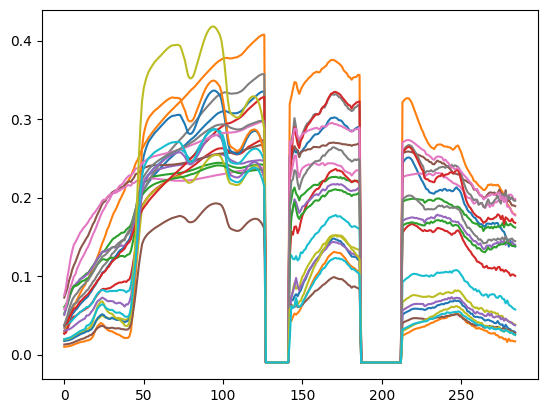

In [22]:
fig, ax = plt.subplots()
num_spectra = 20
for i, j in zip(
    rng.choice(np.arange(emit_003_data.shape[0]), size=num_spectra),
    rng.choice(np.arange(emit_003_data.shape[1]), size=num_spectra),
):
    ax.plot(
        np.arange(len(emit_003_data[i,j,:].data)),
        emit_003_data[i,j,:].data,
    )
plt.show(fig)